In [1]:
#%% Libraries
import pandas as pd
import warnings
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import resample
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV as RFECV_SKYLEARN
pd.options.display.max_columns = 100
#pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

# Model

## First test with all Kernels

In [2]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Open File
albert = pd.read_csv('C:/Users/user/Documents/1. GitHub/Albert_Einstein/data.csv')
# Order categories
categories = pd.Categorical(albert['target'], categories=['low', 'med', 'high'], ordered=True)
categories
# Label your target with numerical values
labels, unique = pd.factorize(categories, sort=True)
albert['target'] = labels

['med', 'med', 'med', 'med', 'med', ..., 'high', 'high', 'high', 'high', 'high']
Length: 10000
Categories (3, object): ['low' < 'med' < 'high']

In [4]:
X = albert[['x1', 'x2', 'x3']]
y = albert['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

In [5]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)
allDone()

In [7]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.605
Accuracy Polynomial Kernel: 0.605
Accuracy Radial Basis Kernel: 0.5935
Accuracy Sigmoid Kernel: 0.497


In [9]:
# Set predict variables
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)
# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)

[[1210    0    0]
 [ 180    0    0]
 [ 610    0    0]]
[[1210    0    0]
 [ 180    0    0]
 [ 610    0    0]]
[[1164    3   43]
 [ 172    0    8]
 [ 587    0   23]]
[[931 203  76]
 [144  27   9]
 [477  97  36]]


## Hyperarameters: tune model

In [ ]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

allDone()

# Tuning hyper-parameters for precision



GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='precision_macro')

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.200 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.200 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.200 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.200 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.200 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.200 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.200 (+/-0.000) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.200 (+/-0.000) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.200 (+/-0.000) for {'C': 1, 'kernel': 'linear'}
0.200 (+/-0.000) for {'C': 10, 'kernel': 'linear'}
0.200 (+/-0.000) for {'C': 100, 'kernel': 'linear'}
0.200 (+/-0.000) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              

## Score your model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Set your variables, separating your target from the rest of the features
X = albert[['x1', 'x2', 'x3']]
y = albert['target']
#data_dmatrix = xgb.DMatrix(data=X,label=y)

#Split test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Model
sig = svm.SVC(kernel='rbf', C=1, gama=0.001, decision_function_shape='ovo').fit(X_train, y_train)



# Fit Model
sig.fit(X_train, y_train)  

# See your prediction score
preds = sig.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmsle = np.sqrt(mean_squared_log_error( y_test, preds))
F1_weight = f1_score(y_test, preds, average='weighted')
F1_macro = f1_score(y_test, preds, average='macro')
F1_micro = f1_score(y_test, preds, average='micro')
print("\n\n\n\nSEE YOUR RMSE SCORE: %f" % (rmse))
print("SEE YOUR RMSEL SCORE: %f" % (rmsle), "\n")
print("SEE YOUR F1_weight SCORE: %f" % (F1_weight))
print("SEE YOUR F1_macro SCORE: %f" % (F1_macro))
print("SEE YOUR F1_micro SCORE: %f" % (F1_micro),"\n" )

In [ ]:
# Oh, wait...our F1-Micro which computes our multiclass accuracy is low...what about class weight trick instead of StandardScaler?

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Set your variables, separating your target from the rest of the features
X = albert[['x1', 'x2', 'x3']]
y = albert['target']
#data_dmatrix = xgb.DMatrix(data=X,label=y)

#Split test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Model
sig = svm.SVC(kernel='rbf', C=1, gamma=0.001, class_weight= 'balanced', decision_function_shape='ovo').fit(X_train, y_train)

# Fit Model
sig.fit(X_train, y_train)  

# See your prediction score
preds = sig.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmsle = np.sqrt(mean_squared_log_error( y_test, preds))
F1_weight = f1_score(y_test, preds, average='weighted')
F1_macro = f1_score(y_test, preds, average='macro')
F1_micro = f1_score(y_test, preds, average='micro')
print("\n\n\n\nSEE YOUR RMSE SCORE: %f" % (rmse))
print("SEE YOUR RMSEL SCORE: %f" % (rmsle), "\n")
print("SEE YOUR F1_weight SCORE: %f" % (F1_weight))
print("SEE YOUR F1_macro SCORE: %f" % (F1_macro))
print("SEE YOUR F1_micro SCORE: %f" % (F1_micro),"\n" )

SVC(C=1, class_weight='balanced', decision_function_shape='ovo', gamma=0.001)





SEE YOUR RMSE SCORE: 1.282316
SEE YOUR RMSEL SCORE: 0.717899 

SEE YOUR F1_weight SCORE: 0.373947
SEE YOUR F1_macro SCORE: 0.305431
SEE YOUR F1_micro SCORE: 0.344667 



In [ ]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01
#create the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

In [ ]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel('x1')
    plt.ylabel('target')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [ ]:
# Not many improvements after one hour of tuning...

# Predict

In [ ]:
# How many randoms?
#randoms = pd.DataFrame(clf.predict_proba(X_test)[:, 1], columns=['prob']).query('0.2 < prob < 0.6 ')
#randoms
#print(randoms.shape)

In [ ]:
# 52 from 10000 is irrelevant

In [ ]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [ ]:
# Get the predictions and put them on the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(sig.predict(X_output),2)

# Randomly pick some observations
#random_picks = np.arange(1,330,50) # Every 50 rows
predict_table = X_output.iloc[:]
predict_table

In [ ]:
#%% Predict on your Unseen Data
data = albert.sample(frac=0.95, random_state=786)
data_unseen = albert.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))
data_unseen

# Backup your old column to compare
target_backup = [data_unseen["target"]]
target_backup = pd.DataFrame(target_backup).T
del data_unseen['target']

# Get the predictions and put them with the unseen data.
X_output = data_unseen.copy()
X_output.loc[:,'predict'] = np.round(sig.predict(X_output),2)

# Randomly pick some observations
#random_picks = np.arange(1,330,50) # Every 50 rows
predict_table = X_output.iloc[:]

# Fill your new table with all variables to compare
predict_table['target'] = target_backup
predict_table = predict_table[['x1', 'x2', 'x3', 'target', 'predict']]
# Boolean function for new column
def Check(predict_table):
   if predict_table['target']== predict_table['predict']:
      return "True"
   else:
      return "False" 
# Result
predict_table['result'] = predict_table.apply(Check, axis=1)
predict_table

predict_table['result'].value_counts()

In [ ]:
# It's good to compare but with parcimony: since it's a hierarchy from low/medium/high, True or False doesn't always has the same weight;

# Visualize

In [2]:
# Set your variables, separating your target from the rest of the features
X = albert[['x1', 'x2', 'x3']]
y = albert['target']

NameError: name 'albert' is not defined

In [ ]:


ri.drop('county_name',
  axis='columns', inplace=True)

TypeError: '(slice(None, None, None), 0)' is an invalid key

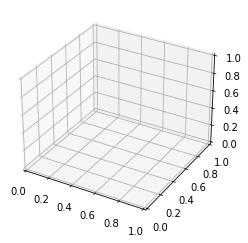

In [14]:
from mpl_toolkits import mplot3d
#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

In [ ]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [4]:
X[:, 0]

NameError: name 'X' is not defined